In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
DATASET_PATH = r"C:\Users\jishn\Downloads\archive (1)\EuroSAT"

IMG_SIZE = 64
BATCH_SIZE = 32
SEED = 123

In [82]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("Classes:", class_names)

Found 27000 files belonging to 10 classes.
Using 21600 files for training.
Found 27000 files belonging to 10 classes.
Using 5400 files for validation.
Classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [58]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [59]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

normalization_layer = layers.Rescaling(1./255)

In [60]:
model = keras.Sequential([

    data_augmentation,
    normalization_layer,

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(len(class_names), activation='softmax')
])

C:\Users\jishn\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [62]:
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

In [63]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [64]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop]
)

Epoch 1/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 53s 66ms/step - accuracy: 0.5997 - loss: 1.2231 - val_accuracy: 0.3376 - val_loss: 3.0716
Epoch 2/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 0.7131 - loss: 0.8234 - val_accuracy: 0.4420 - val_loss: 2.3561
Epoch 3/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 43s 63ms/step - accuracy: 0.7562 - loss: 0.7051 - val_accuracy: 0.7294 - val_loss: 0.7522
Epoch 4/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 0.7879 - loss: 0.6202 - val_accuracy: 0.7381 - val_loss: 0.9001
Epoch 5/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 0.8206 - loss: 0.5278 - val_accuracy: 0.8369 - val_loss: 0.4611
Epoch 6/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 0.8331 - loss: 0.4887 - val_accuracy: 0.7894 - val_loss: 0.6856
Epoch 7/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 0.8534 - loss: 0.4308 - val_accuracy: 0.7454 - val_loss: 0.9082
Epoch 8/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 43s 63ms/step - accuracy: 0.8682 - loss: 0.3967 - 

In [65]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,964,000 (7.49 MB)

 Trainable params: 654,346 (2.50 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 1,308,694 (4.99 MB)

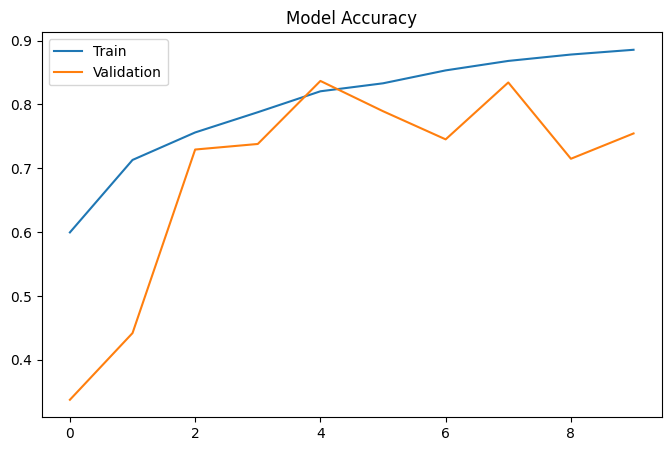

In [66]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'])
plt.title("Model Accuracy")
plt.show()

In [67]:
val_loss, val_acc = model.evaluate(val_ds)
print("Validation Accuracy:", val_acc)

169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8369 - loss: 0.4611
Validation Accuracy: 0.8368518352508545


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━

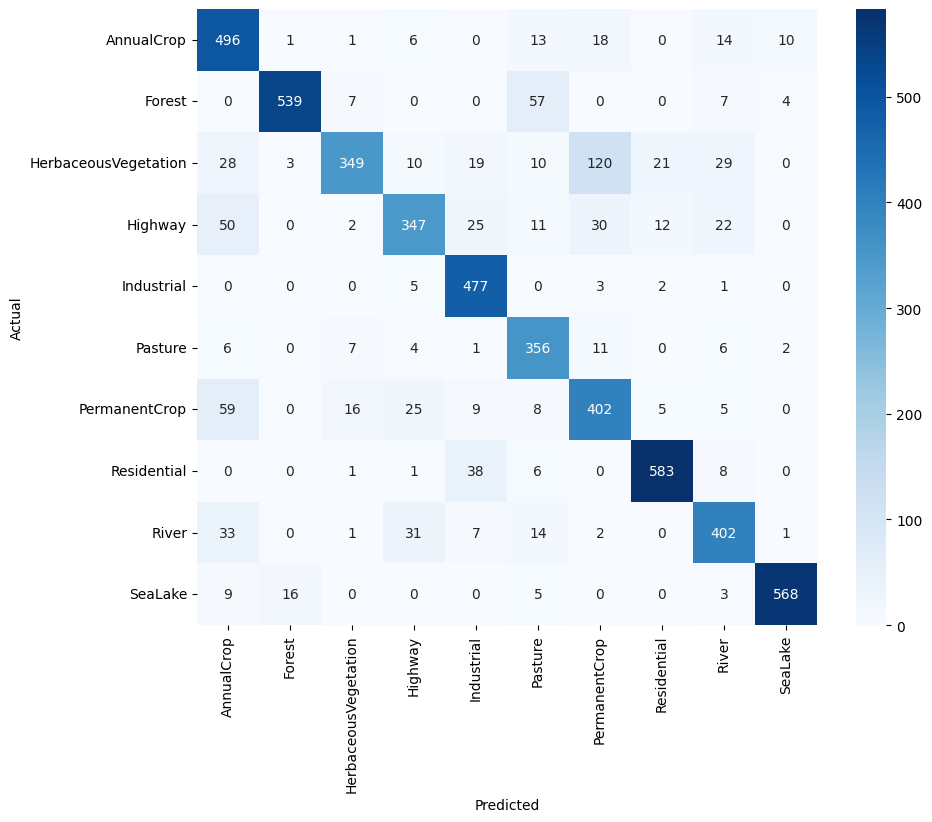

In [68]:
y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [69]:
print(classification_report(y_true, y_pred, target_names=class_names))

                      precision    recall  f1-score   support

          AnnualCrop       0.73      0.89      0.80       559
              Forest       0.96      0.88      0.92       614
HerbaceousVegetation       0.91      0.59      0.72       589
             Highway       0.81      0.70      0.75       499
          Industrial       0.83      0.98      0.90       488
             Pasture       0.74      0.91      0.82       393
       PermanentCrop       0.69      0.76      0.72       529
         Residential       0.94      0.92      0.93       637
               River       0.81      0.82      0.81       491
             SeaLake       0.97      0.95      0.96       601

            accuracy                           0.84      5400
           macro avg       0.84      0.84      0.83      5400
        weighted avg       0.85      0.84      0.84      5400



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


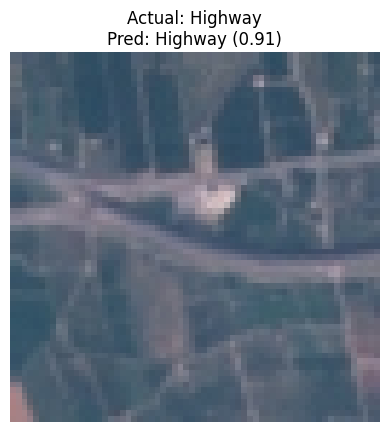

In [72]:
import random

for images, labels in val_ds.take(1):
    idx = random.randint(0, len(images)-1)

    img = images[idx]
    true_label = labels[idx]

    prediction = model.predict(tf.expand_dims(img, axis=0))
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    plt.imshow(img.numpy() / 255.0)   # FIXED
    plt.title(f"Actual: {class_names[true_label]}\nPred: {predicted_class} ({confidence:.2f})")
    plt.axis("off")
    plt.show()

In [73]:
model.save("eurosat_cnn_model.h5")